In [570]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Understanding the Data

In [571]:
data = pd.read_csv('survey.csv')

In [572]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [573]:
data.index

RangeIndex(start=0, stop=1259, step=1)

In [574]:
data.shape

(1259, 27)

In [575]:
data.nunique()

Timestamp                    884
Age                           53
Gender                        49
Country                       48
state                         45
self_employed                  2
family_history                 2
treatment                      2
work_interfere                 4
no_employees                   6
remote_work                    2
tech_company                   2
benefits                       3
care_options                   3
wellness_program               3
seek_help                      3
anonymity                      3
leave                          5
mental_health_consequence      3
phys_health_consequence        3
coworkers                      3
supervisor                     3
mental_health_interview        3
phys_health_interview          3
mental_vs_physical             3
obs_consequence                2
comments                     160
dtype: int64

nunique() function return number of unique elements in the object. It returns a scalar value which is the count of all the unique values in the Index. By default the NaN values are not included in the count.

In [576]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [577]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [578]:
type(data)

pandas.core.frame.DataFrame

# Cleaning the Data

In [579]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [580]:
data = data.drop(['state'], axis=1)

In [581]:
data.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,NaN,No,Yes,Often,25-Jun,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,No,No,Rarely,25-Jun,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [582]:
data = data.drop(['no_employees'], axis=1)
data = data.drop(['tech_company'], axis=1)
data = data.drop(['benefits'], axis=1)
data = data.drop(['care_options'], axis=1)
data = data.drop(['wellness_program'], axis=1)
data = data.drop(['anonymity'], axis=1)
data = data.drop(['phys_health_consequence'], axis=1)
data = data.drop(['supervisor'], axis=1)
data = data.drop(['mental_health_interview'], axis=1)
data = data.drop(['phys_health_interview'], axis=1)
data = data.drop(['mental_vs_physical'], axis=1)
data = data.drop(['obs_consequence'], axis=1)
data = data.drop(['comments'], axis=1)

In [583]:
data.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,seek_help,leave,mental_health_consequence,coworkers
0,8/27/2014 11:29,37,Female,United States,NaN,No,Yes,Often,No,Yes,Somewhat easy,No,Some of them
1,8/27/2014 11:29,44,M,United States,NaN,No,No,Rarely,No,Don't know,Don't know,Maybe,No
2,8/27/2014 11:29,32,Male,Canada,NaN,No,No,Rarely,No,No,Somewhat difficult,No,Yes
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,Yes,Yes,Often,No,No,Somewhat difficult,Yes,Some of them
4,8/27/2014 11:30,31,Male,United States,NaN,No,No,Never,Yes,Don't know,Don't know,No,Some of them


In [584]:
data.shape

(1259, 13)

In [585]:
data.isnull().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
seek_help                      0
leave                          0
mental_health_consequence      0
coworkers                      0
dtype: int64

In [586]:
data = data.fillna(method = "ffill")

In [587]:
data

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,seek_help,leave,mental_health_consequence,coworkers
0,8/27/2014 11:29,37,Female,United States,NaN,No,Yes,Often,No,Yes,Somewhat easy,No,Some of them
1,8/27/2014 11:29,44,M,United States,NaN,No,No,Rarely,No,Don't know,Don't know,Maybe,No
2,8/27/2014 11:29,32,Male,Canada,NaN,No,No,Rarely,No,No,Somewhat difficult,No,Yes
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,Yes,Yes,Often,No,No,Somewhat difficult,Yes,Some of them
4,8/27/2014 11:30,31,Male,United States,NaN,No,No,Never,Yes,Don't know,Don't know,No,Some of them
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,male,United Kingdom,No,No,Yes,Rarely,No,No,Somewhat easy,No,Some of them
1255,9/26/2015 1:07,32,Male,United States,No,Yes,Yes,Often,Yes,No,Somewhat difficult,No,Some of them
1256,11/7/2015 12:36,34,male,United States,No,Yes,Yes,Sometimes,No,No,Somewhat difficult,Yes,No
1257,11/30/2015 21:25,46,f,United States,No,No,No,Sometimes,Yes,No,Don't know,Yes,No


In [588]:
data.isnull().sum()

Timestamp                     0
Age                           0
Gender                        0
Country                       0
self_employed                18
family_history                0
treatment                     0
work_interfere                0
remote_work                   0
seek_help                     0
leave                         0
mental_health_consequence     0
coworkers                     0
dtype: int64

In [589]:
data['Gender'].nunique()

49

In [590]:
print(data['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [591]:
data['Gender']=data['Gender'].replace(['female', 'Trans-female', 'Cis Female', 'F', 'Woman', 'f', 'queer/she/they', 'Femake', 'women', 'woman', 'Female ', 'cis-female/femme', 'Trans woman', 'Female (trans)', 'queer', 'Female (cis)', 'femail', 'Female'], 'Female')

In [592]:
data['Gender'].nunique()

33

In [593]:
data['Gender'] =data['Gender']. replace(['M', 'Male', 'male', 'm', 'Male-ish', 'maile', 'something kinda male?', 'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Male ', 'Male','Man','msle', 'Mail','cis male', 'Malr', 'Cis Man'], 'Male')

In [594]:
data['Gender'].nunique()

14

In [595]:
print(data['Gender'].unique())

['Female' 'Male' 'non-binary' 'Nah' 'All' 'Enby' 'fluid' 'Genderqueer'
 'Androgyne' 'Agender' 'Neuter' 'A little about you' 'p'
 'ostensibly male, unsure what that really means']


In [596]:
print(data['self_employed'].unique())

[nan 'Yes' 'No']


In [597]:
print(data['family_history'].unique())

['No' 'Yes']


In [598]:
print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes']


In [599]:
data

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,seek_help,leave,mental_health_consequence,coworkers
0,8/27/2014 11:29,37,Female,United States,NaN,No,Yes,Often,No,Yes,Somewhat easy,No,Some of them
1,8/27/2014 11:29,44,Male,United States,NaN,No,No,Rarely,No,Don't know,Don't know,Maybe,No
2,8/27/2014 11:29,32,Male,Canada,NaN,No,No,Rarely,No,No,Somewhat difficult,No,Yes
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,Yes,Yes,Often,No,No,Somewhat difficult,Yes,Some of them
4,8/27/2014 11:30,31,Male,United States,NaN,No,No,Never,Yes,Don't know,Don't know,No,Some of them
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,Male,United Kingdom,No,No,Yes,Rarely,No,No,Somewhat easy,No,Some of them
1255,9/26/2015 1:07,32,Male,United States,No,Yes,Yes,Often,Yes,No,Somewhat difficult,No,Some of them
1256,11/7/2015 12:36,34,Male,United States,No,Yes,Yes,Sometimes,No,No,Somewhat difficult,Yes,No
1257,11/30/2015 21:25,46,Female,United States,No,No,No,Sometimes,Yes,No,Don't know,Yes,No


In [600]:
data=data.dropna()

In [601]:
data

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,seek_help,leave,mental_health_consequence,coworkers
18,8/27/2014 11:34,46,Male,United States,Yes,Yes,No,Sometimes,Yes,Don't know,Very easy,No,Yes
19,8/27/2014 11:35,36,Male,France,Yes,Yes,No,Sometimes,Yes,No,Somewhat easy,No,Some of them
20,8/27/2014 11:35,29,Male,United States,No,Yes,Yes,Sometimes,No,No,Somewhat difficult,Maybe,Some of them
21,8/27/2014 11:35,31,Male,United States,Yes,No,No,Never,Yes,No,Somewhat difficult,No,Some of them
22,8/27/2014 11:35,46,Male,United States,No,No,Yes,Often,Yes,No,Don't know,Maybe,Some of them
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,Male,United Kingdom,No,No,Yes,Rarely,No,No,Somewhat easy,No,Some of them
1255,9/26/2015 1:07,32,Male,United States,No,Yes,Yes,Often,Yes,No,Somewhat difficult,No,Some of them
1256,11/7/2015 12:36,34,Male,United States,No,Yes,Yes,Sometimes,No,No,Somewhat difficult,Yes,No
1257,11/30/2015 21:25,46,Female,United States,No,No,No,Sometimes,Yes,No,Don't know,Yes,No


In [602]:
print(data['self_employed'].unique())

['Yes' 'No']


In [603]:
data.nunique()

Timestamp                    879
Age                           53
Gender                        14
Country                       48
self_employed                  2
family_history                 2
treatment                      2
work_interfere                 4
remote_work                    2
seek_help                      3
leave                          5
mental_health_consequence      3
coworkers                      3
dtype: int64

In [604]:
print(data['leave'].unique())

['Very easy' 'Somewhat easy' 'Somewhat difficult' "Don't know"
 'Very difficult']


In [605]:
data = data.drop(['leave'], axis=1)
data = data.drop(['Timestamp'], axis=1)

In [606]:
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,seek_help,mental_health_consequence,coworkers
18,46,Male,United States,Yes,Yes,No,Sometimes,Yes,Don't know,No,Yes
19,36,Male,France,Yes,Yes,No,Sometimes,Yes,No,No,Some of them
20,29,Male,United States,No,Yes,Yes,Sometimes,No,No,Maybe,Some of them
21,31,Male,United States,Yes,No,No,Never,Yes,No,No,Some of them
22,46,Male,United States,No,No,Yes,Often,Yes,No,Maybe,Some of them
...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,Rarely,No,No,No,Some of them
1255,32,Male,United States,No,Yes,Yes,Often,Yes,No,No,Some of them
1256,34,Male,United States,No,Yes,Yes,Sometimes,No,No,Yes,No
1257,46,Female,United States,No,No,No,Sometimes,Yes,No,Yes,No


In [607]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 18 to 1258
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1241 non-null   int64 
 1   Gender                     1241 non-null   object
 2   Country                    1241 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1241 non-null   object
 5   treatment                  1241 non-null   object
 6   work_interfere             1241 non-null   object
 7   remote_work                1241 non-null   object
 8   seek_help                  1241 non-null   object
 9   mental_health_consequence  1241 non-null   object
 10  coworkers                  1241 non-null   object
dtypes: int64(1), object(10)
memory usage: 116.3+ KB


In [608]:
data = data[data.Gender != 'Nah']

In [609]:
print(data['Gender'].unique())

['Male' 'Female' 'non-binary' 'All' 'Enby' 'fluid' 'Genderqueer'
 'Androgyne' 'Agender' 'Neuter' 'A little about you' 'p'
 'ostensibly male, unsure what that really means']


In [610]:
data = data[data.Gender != 'non-binary']

In [611]:
print(data['Gender'].unique())

['Male' 'Female' 'All' 'Enby' 'fluid' 'Genderqueer' 'Androgyne' 'Agender'
 'Neuter' 'A little about you' 'p'
 'ostensibly male, unsure what that really means']


In [612]:
values = ['All','Enby','fluid','Genderqueer','Androgyne','Agender','Neuter','A little about you','p'
,'ostensibly male, unsure what that really means']

In [613]:
data = data[data.Gender.isin(values) == False]

In [614]:
print(data['Gender'].unique())

['Male' 'Female']


In [615]:
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,seek_help,mental_health_consequence,coworkers
18,46,Male,United States,Yes,Yes,No,Sometimes,Yes,Don't know,No,Yes
19,36,Male,France,Yes,Yes,No,Sometimes,Yes,No,No,Some of them
20,29,Male,United States,No,Yes,Yes,Sometimes,No,No,Maybe,Some of them
21,31,Male,United States,Yes,No,No,Never,Yes,No,No,Some of them
22,46,Male,United States,No,No,Yes,Often,Yes,No,Maybe,Some of them
...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,Rarely,No,No,No,Some of them
1255,32,Male,United States,No,Yes,Yes,Often,Yes,No,No,Some of them
1256,34,Male,United States,No,Yes,Yes,Sometimes,No,No,Yes,No
1257,46,Female,United States,No,No,No,Sometimes,Yes,No,Yes,No


In [616]:
print(data['Age'].unique())

[   46    36    29    31    41    33    35    34    37    32    30    42
    40    27    38    50    24    18    28    26    22    44    23    19
    25    39    45    21   -29    43    56    60    54   329    55    48
    20    57    58    47    62    51    65    49 -1726     5    53    61
    11    72]


In [617]:
values = [-29, 329, -1726, 5, 72, 11]

In [618]:
data = data[data.Age.isin(values) == False]

In [619]:
print(data['Age'].unique())

[46 36 29 31 41 33 35 34 37 32 30 42 40 27 38 50 24 18 28 26 22 44 23 19
 25 39 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61]


In [620]:
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,seek_help,mental_health_consequence,coworkers
18,46,Male,United States,Yes,Yes,No,Sometimes,Yes,Don't know,No,Yes
19,36,Male,France,Yes,Yes,No,Sometimes,Yes,No,No,Some of them
20,29,Male,United States,No,Yes,Yes,Sometimes,No,No,Maybe,Some of them
21,31,Male,United States,Yes,No,No,Never,Yes,No,No,Some of them
22,46,Male,United States,No,No,Yes,Often,Yes,No,Maybe,Some of them
...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,Rarely,No,No,No,Some of them
1255,32,Male,United States,No,Yes,Yes,Often,Yes,No,No,Some of them
1256,34,Male,United States,No,Yes,Yes,Sometimes,No,No,Yes,No
1257,46,Female,United States,No,No,No,Sometimes,Yes,No,Yes,No


# Relation Between the Variables

In [621]:
data['Country'].value_counts()

United States             731
United Kingdom            177
Canada                     68
Germany                    44
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Austria                     3
Bulgaria                    3
Mexico                      3
Russia                      3
Finland                     3
Denmark                     2
Greece                      2
Colombia                    2
Portugal                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Czech Repu

In [622]:
data['self_employed'].value_counts()

No     1082
Yes     141
Name: self_employed, dtype: int64

In [623]:
data.describe()

,Age
count,1223.000000
mean,32.052330
std,7.226896
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,65.000000


In [624]:
data[['self_employed','work_interfere']].value_counts()

self_employed  work_interfere
No             Sometimes         511
               Never             237
               Rarely            188
               Often             146
Yes            Sometimes          68
               Often              29
               Never              23
               Rarely             21
dtype: int64

C:\Users\VC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

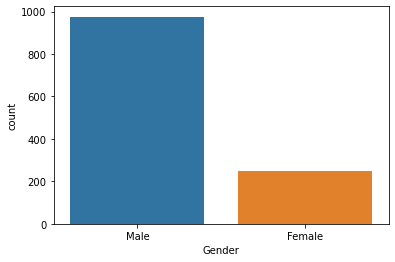

In [625]:
sns.countplot(data['Gender'])

In [626]:
data['Gender'].value_counts()

Male      976
Female    247
Name: Gender, dtype: int64

In [627]:
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,seek_help,mental_health_consequence,coworkers
18,46,Male,United States,Yes,Yes,No,Sometimes,Yes,Don't know,No,Yes
19,36,Male,France,Yes,Yes,No,Sometimes,Yes,No,No,Some of them
20,29,Male,United States,No,Yes,Yes,Sometimes,No,No,Maybe,Some of them
21,31,Male,United States,Yes,No,No,Never,Yes,No,No,Some of them
22,46,Male,United States,No,No,Yes,Often,Yes,No,Maybe,Some of them
...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,Rarely,No,No,No,Some of them
1255,32,Male,United States,No,Yes,Yes,Often,Yes,No,No,Some of them
1256,34,Male,United States,No,Yes,Yes,Sometimes,No,No,Yes,No
1257,46,Female,United States,No,No,No,Sometimes,Yes,No,Yes,No


In [628]:
print(data['self_employed'].unique())

['Yes' 'No']


In [629]:
print(data['family_history'].unique())

['Yes' 'No']


In [630]:
print(data['treatment'].unique())

['No' 'Yes']


In [631]:
print(data['remote_work'].unique())

['Yes' 'No']


# Converting Catogoricl Data to Binary Data

In [632]:
dummy = pd.get_dummies(data['self_employed'])

In [633]:
dummy.head()

,No,Yes
18,0,1
19,0,1
20,1,0
21,0,1
22,1,0


In [634]:
data= pd.concat((data, dummy), axis=1)

In [635]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,seek_help,mental_health_consequence,coworkers,No,Yes
18,46,Male,United States,Yes,Yes,No,Sometimes,Yes,Don't know,No,Yes,0,1
19,36,Male,France,Yes,Yes,No,Sometimes,Yes,No,No,Some of them,0,1
20,29,Male,United States,No,Yes,Yes,Sometimes,No,No,Maybe,Some of them,1,0
21,31,Male,United States,Yes,No,No,Never,Yes,No,No,Some of them,0,1
22,46,Male,United States,No,No,Yes,Often,Yes,No,Maybe,Some of them,1,0


In [636]:
data = data.drop(['self_employed'], axis=1)
data = data.drop(['No'], axis=1)

In [637]:
data=data.rename(columns={'Yes': 'self_employed'})

In [638]:
data

,Age,Gender,Country,family_history,treatment,work_interfere,remote_work,seek_help,mental_health_consequence,coworkers,self_employed
18,46,Male,United States,Yes,No,Sometimes,Yes,Don't know,No,Yes,1
19,36,Male,France,Yes,No,Sometimes,Yes,No,No,Some of them,1
20,29,Male,United States,Yes,Yes,Sometimes,No,No,Maybe,Some of them,0
21,31,Male,United States,No,No,Never,Yes,No,No,Some of them,1
22,46,Male,United States,No,Yes,Often,Yes,No,Maybe,Some of them,0
...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,Yes,Rarely,No,No,No,Some of them,0
1255,32,Male,United States,Yes,Yes,Often,Yes,No,No,Some of them,0
1256,34,Male,United States,Yes,Yes,Sometimes,No,No,Yes,No,0
1257,46,Female,United States,No,No,Sometimes,Yes,No,Yes,No,0


In [639]:
dummy = pd.get_dummies(data['family_history'])
data= pd.concat((data, dummy), axis=1)
data.head()

,Age,Gender,Country,family_history,treatment,work_interfere,remote_work,seek_help,mental_health_consequence,coworkers,self_employed,No,Yes
18,46,Male,United States,Yes,No,Sometimes,Yes,Don't know,No,Yes,1,0,1
19,36,Male,France,Yes,No,Sometimes,Yes,No,No,Some of them,1,0,1
20,29,Male,United States,Yes,Yes,Sometimes,No,No,Maybe,Some of them,0,0,1
21,31,Male,United States,No,No,Never,Yes,No,No,Some of them,1,1,0
22,46,Male,United States,No,Yes,Often,Yes,No,Maybe,Some of them,0,1,0


In [640]:
data = data.drop(['family_history'], axis=1)
data = data.drop(['No'], axis=1)

In [641]:
data=data.rename(columns={'Yes': 'family_history'})
data

,Age,Gender,Country,treatment,work_interfere,remote_work,seek_help,mental_health_consequence,coworkers,self_employed,family_history
18,46,Male,United States,No,Sometimes,Yes,Don't know,No,Yes,1,1
19,36,Male,France,No,Sometimes,Yes,No,No,Some of them,1,1
20,29,Male,United States,Yes,Sometimes,No,No,Maybe,Some of them,0,1
21,31,Male,United States,No,Never,Yes,No,No,Some of them,1,0
22,46,Male,United States,Yes,Often,Yes,No,Maybe,Some of them,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,Yes,Rarely,No,No,No,Some of them,0,0
1255,32,Male,United States,Yes,Often,Yes,No,No,Some of them,0,1
1256,34,Male,United States,Yes,Sometimes,No,No,Yes,No,0,1
1257,46,Female,United States,No,Sometimes,Yes,No,Yes,No,0,0


In [642]:
dummy = pd.get_dummies(data['treatment'])
data= pd.concat((data, dummy), axis=1)
data.head()

,Age,Gender,Country,treatment,work_interfere,remote_work,seek_help,mental_health_consequence,coworkers,self_employed,family_history,No,Yes
18,46,Male,United States,No,Sometimes,Yes,Don't know,No,Yes,1,1,1,0
19,36,Male,France,No,Sometimes,Yes,No,No,Some of them,1,1,1,0
20,29,Male,United States,Yes,Sometimes,No,No,Maybe,Some of them,0,1,0,1
21,31,Male,United States,No,Never,Yes,No,No,Some of them,1,0,1,0
22,46,Male,United States,Yes,Often,Yes,No,Maybe,Some of them,0,0,0,1


In [643]:
data = data.drop(['treatment'], axis=1)
data = data.drop(['No'], axis=1)

In [644]:
data=data.rename(columns={'Yes': 'treatment'})
data

,Age,Gender,Country,work_interfere,remote_work,seek_help,mental_health_consequence,coworkers,self_employed,family_history,treatment
18,46,Male,United States,Sometimes,Yes,Don't know,No,Yes,1,1,0
19,36,Male,France,Sometimes,Yes,No,No,Some of them,1,1,0
20,29,Male,United States,Sometimes,No,No,Maybe,Some of them,0,1,1
21,31,Male,United States,Never,Yes,No,No,Some of them,1,0,0
22,46,Male,United States,Often,Yes,No,Maybe,Some of them,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,Rarely,No,No,No,Some of them,0,0,1
1255,32,Male,United States,Often,Yes,No,No,Some of them,0,1,1
1256,34,Male,United States,Sometimes,No,No,Yes,No,0,1,1
1257,46,Female,United States,Sometimes,Yes,No,Yes,No,0,0,0


In [645]:
dummy = pd.get_dummies(data['remote_work'])
data= pd.concat((data, dummy), axis=1)
data.head()

,Age,Gender,Country,work_interfere,remote_work,seek_help,mental_health_consequence,coworkers,self_employed,family_history,treatment,No,Yes
18,46,Male,United States,Sometimes,Yes,Don't know,No,Yes,1,1,0,0,1
19,36,Male,France,Sometimes,Yes,No,No,Some of them,1,1,0,0,1
20,29,Male,United States,Sometimes,No,No,Maybe,Some of them,0,1,1,1,0
21,31,Male,United States,Never,Yes,No,No,Some of them,1,0,0,0,1
22,46,Male,United States,Often,Yes,No,Maybe,Some of them,0,0,1,0,1


In [646]:
data = data.drop(['remote_work'], axis=1)
data = data.drop(['No'], axis=1)

In [647]:
data=data.rename(columns={'Yes': 'remote_work'})
data

,Age,Gender,Country,work_interfere,seek_help,mental_health_consequence,coworkers,self_employed,family_history,treatment,remote_work
18,46,Male,United States,Sometimes,Don't know,No,Yes,1,1,0,1
19,36,Male,France,Sometimes,No,No,Some of them,1,1,0,1
20,29,Male,United States,Sometimes,No,Maybe,Some of them,0,1,1,0
21,31,Male,United States,Never,No,No,Some of them,1,0,0,1
22,46,Male,United States,Often,No,Maybe,Some of them,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,Rarely,No,No,Some of them,0,0,1,0
1255,32,Male,United States,Often,No,No,Some of them,0,1,1,1
1256,34,Male,United States,Sometimes,No,Yes,No,0,1,1,0
1257,46,Female,United States,Sometimes,No,Yes,No,0,0,0,1


C:\Users\VC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

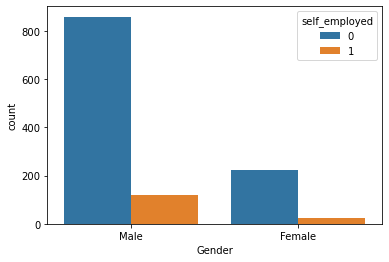

In [649]:
sns.countplot('Gender', hue="self_employed", data=data)

In [650]:
pd.crosstab(data['Gender'], data['self_employed'], margins=True)

self_employed,0,1,All
Gender,,,
Female,224,23,247
Male,858,118,976
All,1082,141,1223


C:\Users\VC\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\VC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


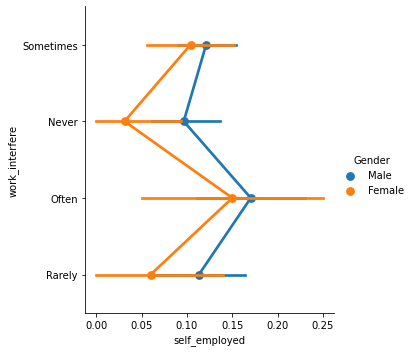

In [663]:
sns.factorplot('self_employed', 'work_interfere', hue='Gender', data=data)

C:\Users\VC\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\VC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


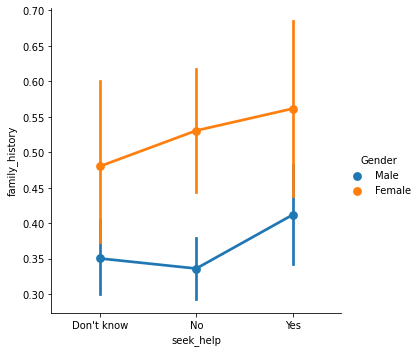

In [666]:
sns.factorplot('seek_help', 'family_history', hue='Gender', data=data)

(array([ 58., 299., 353., 224., 166.,  80.,  18.,  12.,  10.,   3.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <BarContainer object of 10 artists>)

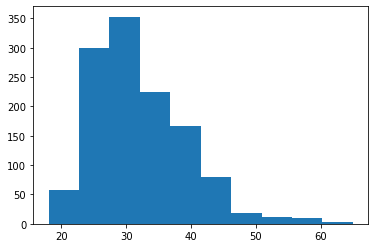

In [668]:
plt.hist(data['Age'])

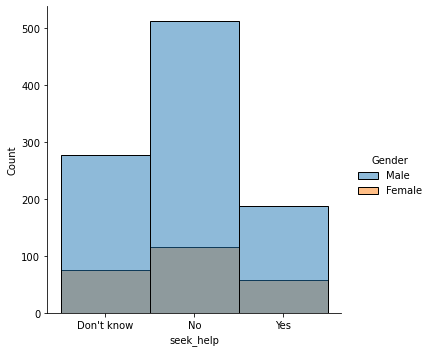

In [670]:
sns.displot(data, x="seek_help", hue="Gender")

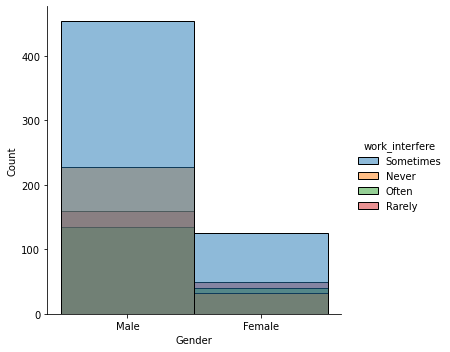

In [671]:
sns.displot(data, x="Gender", hue="work_interfere")

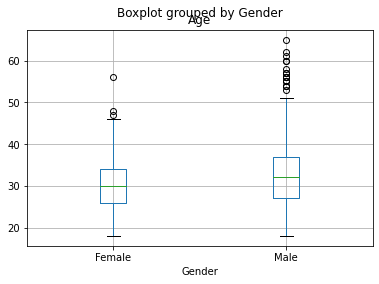

In [682]:
boxplot = data.boxplot(by='Gender',column=['Age'])

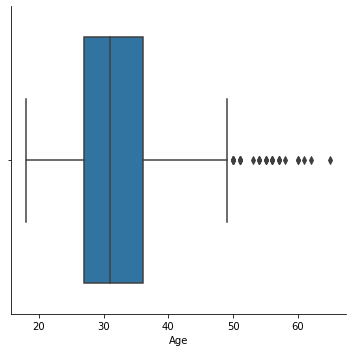

In [688]:
sns.catplot(x='Age', kind='box', data=data)

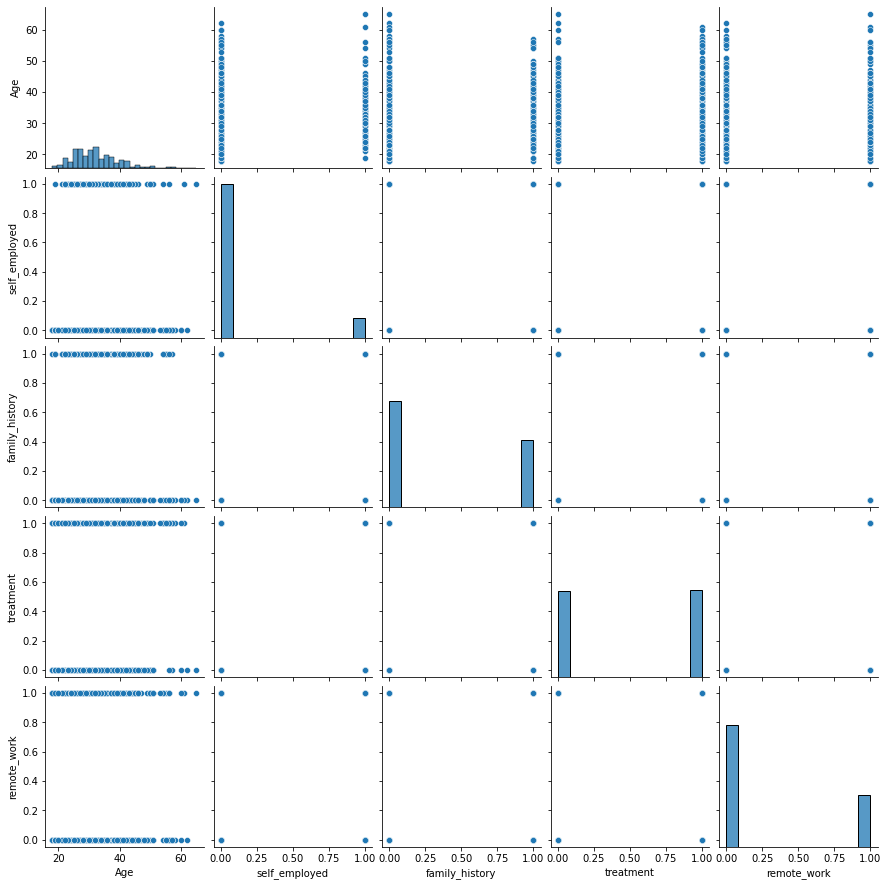

In [689]:
sns.pairplot(data)

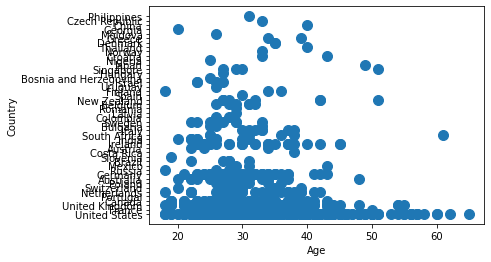

In [707]:
data.plot.scatter(x='Age',y='Country', s=100);

NameError: name 'corelation' is not defined